In [1]:
import pandas as pd
import plotly_express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as st
import datetime
from sklearn import linear_model

In [2]:
def change_date(s):
    s = datetime.datetime.strptime(s, "%Y/%m/%d")  
    s = str(s)  
    return s[:10] 
price = pd.read_csv( "PricesFile1.csv")
price_wti=price[price['priceindex'].isin(['WTI NYMEX LIGHT SWEET'])]
price_wti['pricedate'] = price_wti['pricedate'].map(change_date) 
price_wti['delivdate'] = price_wti['delivdate'].map(change_date) 
price_wti=price_wti.sort_values(by=['pricedate','delivdate'], ascending=[True, True])
price_wti.reset_index(drop=True, inplace=True)
price_wti

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,priceindex,pricedate,delivdate,price
0,WTI NYMEX LIGHT SWEET,2020-03-02,2020-03-01,53.779
1,WTI NYMEX LIGHT SWEET,2020-03-02,2020-04-01,46.749
2,WTI NYMEX LIGHT SWEET,2020-03-02,2020-05-01,46.919
3,WTI NYMEX LIGHT SWEET,2020-03-02,2020-06-01,47.049
4,WTI NYMEX LIGHT SWEET,2020-03-02,2020-07-01,47.139
5,WTI NYMEX LIGHT SWEET,2020-03-02,2020-08-01,47.199
6,WTI NYMEX LIGHT SWEET,2020-03-02,2020-09-01,47.249
7,WTI NYMEX LIGHT SWEET,2020-03-02,2020-10-01,47.309
8,WTI NYMEX LIGHT SWEET,2020-03-02,2020-11-01,47.399
9,WTI NYMEX LIGHT SWEET,2020-03-02,2020-12-01,47.489


In [3]:
whole = pd.read_csv( "master_wti_complete.csv")
whole

,priceindex,pricedate,delivdate,price,key,duration,duration_months,volatilityindex,strikeprice,volatility,pricedate_r,maturity,bidrate,number,MorY,months
0,WTI NYMEX LIGHT SWEET,2020-03-02,2020-04-01,46.749,"2020-03-02,2020-04-01",30 days 00:00:00.000000000,1.0,V_WTI NYMEX LIGHT SWEET,25.0,0.933,2020-03-02,1M,1.110001,1,M,1
1,WTI NYMEX LIGHT SWEET,2020-03-02,2020-04-01,46.749,"2020-03-02,2020-04-01",30 days 00:00:00.000000000,1.0,V_WTI NYMEX LIGHT SWEET,25.5,0.913,2020-03-02,1M,1.110001,1,M,1
2,WTI NYMEX LIGHT SWEET,2020-03-02,2020-04-01,46.749,"2020-03-02,2020-04-01",30 days 00:00:00.000000000,1.0,V_WTI NYMEX LIGHT SWEET,26.0,0.893,2020-03-02,1M,1.110001,1,M,1
3,WTI NYMEX LIGHT SWEET,2020-03-02,2020-04-01,46.749,"2020-03-02,2020-04-01",30 days 00:00:00.000000000,1.0,V_WTI NYMEX LIGHT SWEET,26.5,0.874,2020-03-02,1M,1.110001,1,M,1
4,WTI NYMEX LIGHT SWEET,2020-03-02,2020-04-01,46.749,"2020-03-02,2020-04-01",30 days 00:00:00.000000000,1.0,V_WTI NYMEX LIGHT SWEET,27.0,0.855,2020-03-02,1M,1.110001,1,M,1
5,WTI NYMEX LIGHT SWEET,2020-03-02,2020-04-01,46.749,"2020-03-02,2020-04-01",30 days 00:00:00.000000000,1.0,V_WTI NYMEX LIGHT SWEET,27.5,0.837,2020-03-02,1M,1.110001,1,M,1
6,WTI NYMEX LIGHT SWEET,2020-03-02,2020-04-01,46.749,"2020-03-02,2020-04-01",30 days 00:00:00.000000000,1.0,V_WTI NYMEX LIGHT SWEET,28.0,0.819,2020-03-02,1M,1.110001,1,M,1
7,WTI NYMEX LIGHT SWEET,2020-03-02,2020-04-01,46.749,"2020-03-02,2020-04-01",30 days 00:00:00.000000000,1.0,V_WTI NYMEX LIGHT SWEET,28.5,0.801,2020-03-02,1M,1.110001,1,M,1
8,WTI NYMEX LIGHT SWEET,2020-03-02,2020-04-01,46.749,"2020-03-02,2020-04-01",30 days 00:00:00.000000000,1.0,V_WTI NYMEX LIGHT SWEET,29.0,0.784,2020-03-02,1M,1.110001,1,M,1
9,WTI NYMEX LIGHT SWEET,2020-03-02,2020-04-01,46.749,"2020-03-02,2020-04-01",30 days 00:00:00.000000000,1.0,V_WTI NYMEX LIGHT SWEET,29.5,0.768,2020-03-02,1M,1.110001,1,M,1


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

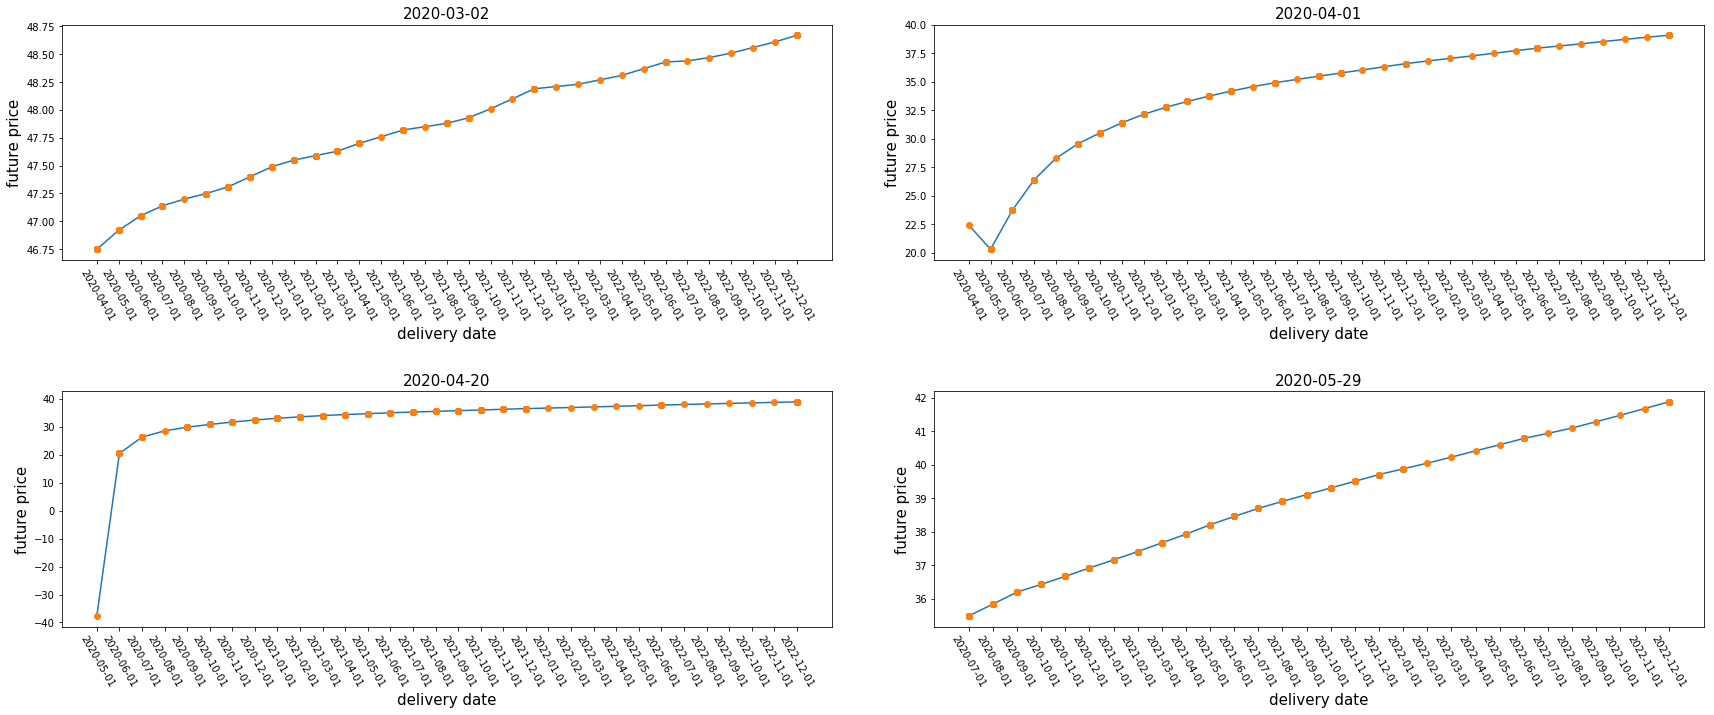

In [4]:
plt.rcParams['figure.figsize'] = (25,10)
plt.subplot(221) 
plt.plot(whole[whole['pricedate']=='2020-03-02']['delivdate'],whole[whole['pricedate']=='2020-03-02']['price'])
plt.plot(whole[whole['pricedate']=='2020-03-02']['delivdate'],whole[whole['pricedate']=='2020-03-02']['price'],'o')
plt.xlabel('delivery date',size=15)
plt.ylabel('future price',size=15)
plt.title('2020-03-02',size=15)
plt.xticks(rotation=300)
plt.subplot(222) 
plt.plot(whole[whole['pricedate']=='2020-04-01']['delivdate'],whole[whole['pricedate']=='2020-04-01']['price'])
plt.plot(whole[whole['pricedate']=='2020-04-01']['delivdate'],whole[whole['pricedate']=='2020-04-01']['price'],'o')
plt.xlabel('delivery date',size=15)
plt.ylabel('future price',size=15)
plt.title('2020-04-01',size=15)
plt.xticks(rotation=300)
plt.tight_layout(5) 
plt.subplot(223) 
plt.plot(whole[whole['pricedate']=='2020-04-20']['delivdate'],whole[whole['pricedate']=='2020-04-20']['price'])
plt.plot(whole[whole['pricedate']=='2020-04-20']['delivdate'],whole[whole['pricedate']=='2020-04-20']['price'],'o')
plt.xlabel('delivery date',size=15)
plt.ylabel('future price',size=15)
plt.title('2020-04-20',size=15)
plt.xticks(rotation=300)
plt.subplot(224) 
plt.plot(whole[whole['pricedate']=='2020-05-29']['delivdate'],whole[whole['pricedate']=='2020-05-29']['price'])
plt.plot(whole[whole['pricedate']=='2020-05-29']['delivdate'],whole[whole['pricedate']=='2020-05-29']['price'],'o')
plt.xlabel('delivery date',size=15)
plt.ylabel('future price',size=15)
plt.title('2020-05-29',size=15)
plt.xticks(rotation=300)

In [74]:
pricedate=whole['pricedate'].unique()
S=[]
for i in list(pricedate):
    S.append(whole[whole['pricedate']==i]['price'].reset_index(drop=True))

In [75]:
a=[]
b=[]
e=[]
for i in range(len(pricedate)):
    n=len(S[i])
    Sx=sum(S[i][0:n-1])
    Sy=sum(S[i][1:n])
    Sxx=sum(S[i][0:n-1]**2)
    Sxy=sum(S[i][0:n-1]*S[i][1:n].reset_index(drop=True))
    Syy=sum(S[i][1:n]**2)
    a.append((n*Sxy-Sx*Sy)/(n*Sxx-Sx**2))
    b.append((Sy-a[i]*Sx)/n)
    e.append(np.sqrt((n*Syy-Sy**2-a[i]*(n*Sxy-Sx*Sy))/(n*(n-2))))
parameter=pd.DataFrame({'a':a,'b':b,'error':e})
parameter

,a,b,error
0,1.000124,-0.004304,0.010913
1,1.000146,-0.005582,0.009840
2,1.000164,-0.006038,0.012056
3,1.000342,-0.013708,0.014839
4,1.000679,-0.024364,0.034241
5,1.000910,-0.022268,0.067132
6,1.000819,-0.022695,0.057170
7,1.000797,-0.020132,0.064034
8,1.000753,-0.016917,0.069667
9,1.000781,-0.018775,0.062534


In [76]:
a=parameter['a'][34]
b=parameter['b'][34]
e=parameter['error'][34]
delta=1
mean_reversion=-np.log(a)/delta
mean_mu=b/(1-a)
sigma=e*np.sqrt(-2*np.log(a)/delta/(1-a**2))
print('mean_reversion:%f, mean:%f, volatility: %f'%(mean_reversion,mean_mu,sigma))

mean_reversion:0.145550, mean:33.099896, volatility: 1.625804


In [77]:
'''
a=parameter['a'].mean()
b=parameter['b'].mean()
e=parameter['error'].mean()
delta=1
mean_reversion=-np.log(a)/delta
mean_mu=b/(1-a)
sigma=e*np.sqrt(-2*np.log(a)/delta/(1-a**2))
print('mean_reversion:%f, mean:%f, volatility: %f'%(mean_reversion,mean_mu,sigma))
'''

"\na=parameter['a'].mean()\nb=parameter['b'].mean()\ne=parameter['error'].mean()\ndelta=1\nmean_reversion=-np.log(a)/delta\nmean_mu=b/(1-a)\nsigma=e*np.sqrt(-2*np.log(a)/delta/(1-a**2))\nprint('mean_reversion:%f, mean:%f, volatility: %f'%(mean_reversion,mean_mu,sigma))\n"

In [78]:
F_0=price_wti[price_wti['pricedate']=='2020-04-20']['price'].reset_index(drop=True)[0]
lamda=((S[34][0]-F_0)/F_0-whole[whole['price']==S[34][0]]['bidrate'])/sigma
lamda

43198   -2.074533
Name: bidrate, dtype: float64

In [9]:
neg=whole[(whole['pricedate']=='2020-04-20')&(whole['delivdate']=='2020-05-01')]
neg

,priceindex,pricedate,delivdate,price,key,duration,duration_months,volatilityindex,strikeprice,volatility,pricedate_r,maturity,bidrate,number,MorY,months
43198,WTI NYMEX LIGHT SWEET,2020-04-20,2020-05-01,-37.631,"2020-04-20,2020-05-01",11 days 00:00:00.000000000,0.0,V_WTI NYMEX LIGHT SWEET,43.5,0.001,2020-04-20,1M,0.695,1,M,1


In [85]:
b_star=mean_mu-lamda*sigma/mean_reversion
Te=1/30
d=(np.exp(-mean_reversion*Te)*(F_0-b_star)-neg['strikeprice'])/(sigma*np.sqrt((1-np.exp(-2*mean_reversion*Te))/2/mean_reversion))
C=np.exp(-neg['bidrate']*Te/12)*((np.exp(mean_reversion*Te)*(F_0-b_star)-neg['strikeprice'])*st.norm.cdf(d)+sigma*np.sqrt((1-np.exp(-2*mean_reversion*Te))/2/mean_reversion)*st.norm.pdf(d))
print('call option price:%f'%C)

call option price:0.000000


In [86]:
P=C+neg['strikeprice']*np.exp(-neg['bidrate']*Te)-F_0
print('put option price:%f'%P)

put option price:20.074833


In [87]:
#April 1st
F_0=whole[(whole['pricedate']=='2020-04-01')&(whole['delivdate']=='2020-04-01')]['price']
F_T=whole[(whole['pricedate']=='2020-04-01')&(whole['delivdate']=='2020-07-01')]['price'].mean()
r=whole[(whole['pricedate']=='2020-04-01')&(whole['delivdate']=='2020-07-01')]['bidrate'].mean()
Te=3-1/3
T=3
a=parameter['a'][22]
b=parameter['b'][22]
e=parameter['error'][22]
delta=1
mean_reversion=-np.log(a)/delta
mean_mu=b/(1-a)
sigma=e*np.sqrt(-2*np.log(a)/delta/(1-a**2))
print('mean_reversion:%f, mean:%f, volatility: %f'%(mean_reversion,mean_mu,sigma))
lamda=((F_T-F_0)/F_0-r/12*T)/sigma
b_star=mean_mu-lamda*sigma/mean_reversion

mean_reversion:0.001149, mean:43.167568, volatility: 0.159596


In [88]:
K=25
d=(np.exp(-mean_reversion*Te)*(F_0-b_star)-K)/(sigma*np.sqrt((1-np.exp(-2*mean_reversion*Te))/2/mean_reversion))
C=np.exp(-r/12*T*Te)*((np.exp(mean_reversion*Te)*(F_0-b_star)-K)*st.norm.cdf(d)+sigma*np.sqrt((1-np.exp(-2*mean_reversion*Te))/2/mean_reversion)*st.norm.pdf(d))
print('call option price:%f'%C)

call option price:3.452099


In [89]:
K=27
d=(np.exp(-mean_reversion*Te)*(F_0-b_star)-K)/(sigma*np.sqrt((1-np.exp(-2*mean_reversion*Te))/2/mean_reversion))
C=np.exp(-r/12*T*Te)*((np.exp(mean_reversion*Te)*(F_0-b_star)-K)*st.norm.cdf(d)+sigma*np.sqrt((1-np.exp(-2*mean_reversion*Te))/2/mean_reversion)*st.norm.pdf(d))
print('call option price:%f'%C)

call option price:1.999804
